<a href="https://colab.research.google.com/github/ferit-osirv/lab1/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1 - Manipulating Image Pixels

These lab exercises are solved in Google Colab and saved to a GitHub repository that is linked to GitHub Classroom.

## The tools you use to submit assignments

In this document you will solve tasks. This is **Jupyter Notebook** and has the extension **.ipynb**, an interactive web environment for data analysis, visualization, solution displays, education, etc.

**Google Colab** is a tool that allows you to run and share Jupyter Notebook files on Google's servers, including using Google's CPU, GPU and TPU resources. Colab is like Google Docs for Jupyter Notebook. **Google Colab does not save your assignment to GitHub automatically.**

**You use GitHub to save and submit your assignment.** When you accept an assignment through GitHub classroom, a repository is automatically created on your GitHub account with a copy of the assignment. You will save your solutions there. By saving the solution, you submit the tasks of that lab.

## How to solve tasks?

1. Accept the assignment via the Google Classroom link you will receive. Google Classroom will create a repository in your account.
2. Enter the newly created repository in your account and click on the **.ipynb** file, then click **Open in Colab**.
3. You solve the tasks in Google Colab.

## How to save (submit) assignments?

1. Inside **Google Colab**, click on the **Open settings** wheel in the upper right corner.
2. Click on the **GitHub** tab and select the checkmark for **Access private repositories and organizations**.
3. A new window will open to add access to GitHub. At **ferit-osirv** click **Grant**.
4. Save and exit settings.


5. Click on **File > Save a copy in GitHub**.
6. Select the created labos repository **which includes your name**.

> *Note:* You only need to do steps 1-4 the first time you submit an assignment.

# Introduction to Jupyter Notebook

Jupyter Notebook consists of two types of blocks: text and code. You are currently reading a text block that can contain text, markdown, or HTML. It is useful for adding more information about your code so that it can be read like a notebook, hence the name Jupyter Notebook.

Code blocks contain Python code or command line commands.

In [6]:
text = "You write your code in code blocks, such as this one."
# A code block will always print the output of the last line of code.
text

'You write your code in code blocks, such as this one.'

You can execute code blocks by selecting them with the mouse and pressing the play button in the upper left corner of the block. You can also execute a block and move to another with the shortcut **Shift+Enter**. **Control+Enter** will export the current block and leave it selected.

The output of the code blocks is located below the block. It can contain printouts via the `print` function, graphs and images using libraries such as OpenCV or matplotlib, etc.

Also, the result of the last line is always printed at the end of the output. You can disable this by adding a semicolon (`;`) to the last line.

Feel free to play with the code blocks and customize this notebook however you want!

**For more tips** see the following notebook: https://colab.research.google.com/notebooks/basic_features_overview.ipynb

## Execution order

It is important to remember that blocks are executed in the order you execute them, not as they are written. For example, consider the following 3 blocks:

In [11]:
a = 3 # Block 1

In [10]:
a = 2 # Block 2

In [12]:
a # Block 3

3

Try executing block 2 first, then block 1 and then block 3. You will notice that the printout of block 3 changes, because block 1 has been executed and `a' has been set to a new value. This behavior can lead to bugs. 

It is a good practice to occasionally, but especially **before submission**, execute all the blocks in order once more. You can do this by clicking on **Runtime > Run all** or by pressing **F9**.

## Lab Notebook Structure

To create laboratory exercises, you will need various libraries such as numpy, OpenCV, matplotlib, etc. It is a good practice **at the beginning** of the notebook to have a **separate block** for introducing all the libraries that will be needed for execution. Example:

In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plot

This way you will ensure that block is always executed and all libraries are loaded. Also, once these libraries are loaded, Google Colab will offer you suggestions (auto-complete) as you write, which will make your work much easier.

### Copying files from the GitHub repository

To create the exercises, you will need images and other files that will be located in the exercise's GitHub repository. This command will be available in the notebook of each exercise. It will copy the files from GitHub to the Google Colab environment.

**This command must be run before starting to do each lab.**

In [1]:
!rm -rf clone && git clone https://github.com/ferit-osirv/lab1 clone && cp -a clone/. .

Cloning into 'clone'...
remote: Enumerating objects: 28, done.
remote: Counting objects: 100% (28/28), done.
remote: Compressing objects: 100% (28/28), done.
remote: Total 28 (delta 3), reused 16 (delta 0), pack-reused 0
Unpacking objects: 100% (28/28), done.


**Google Colab will periodically delete all files.** So you may need to run this command again during your session. If you are getting errors that some file does not exist, try running the command above again.

# Introduction to Image Processing

### Understanding Digital Images

At its core, a digital image is a representation of a visual image (like a photograph or a scene) in a format that can be stored and processed by a computer. Digital images are made up of tiny units called pixels (short for "picture elements"). Each pixel represents the smallest unit of the image and holds information about the color and intensity at that point in the image.

### Color Images and Channels

Color digital images are typically represented in a color space that consists of multiple channels, the most common being the RGB (Red, Green, Blue) color space. In the RGB color space, each color in the image is made by combining different intensities of red, green, and blue light. This combination process can create a wide range of colors, allowing for the rich, vibrant images we see on digital displays.

An RGB image is therefore composed of three 2D arrays (or matrices), one for each color channel. When these arrays are stacked together, they form a 3D array where each layer corresponds to one of the color channels. The intensity of each channel at a given pixel determines the final color and brightness of that pixel in the image.

### Extracting a Specific Channel

To extract a specific channel from an RGB image, you need to access the array corresponding to that channel. In a 3D numpy array representing an RGB image, the first two dimensions correspond to the height and width of the image (i.e., the spatial dimensions), and the third dimension corresponds to the color channels.

For example, if `img` is a numpy array representing an RGB image, then:
- `img[:,:,0]` would access all the rows and columns of the first layer, which corresponds to the Red channel.
- `img[:,:,1]` would access the Green channel.
- `img[:,:,2]` would access the Blue channel.

When you extract a single channel, the result is a 2D array where each element represents the intensity of that color in the corresponding pixel of the image. You can visualize this 2D array as a grayscale image, where higher values indicate more of that color (e.g., a bright area in the red channel image indicates a lot of red light in that part of the original image).

### Practical Application

Understanding how to manipulate and extract information from specific channels is fundamental in many image processing tasks. For instance, you might analyze the green channel specifically for agricultural images, as it can provide valuable information about plant health. Or, you might manipulate the red channel to correct color imbalances in photographs.

By learning to view images as arrays and manipulate those arrays, you're gaining a fundamental skill set that applies across a wide range of image processing applications, from basic photo editing to complex computer vision tasks.


In [13]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

(480, 500, 3)
[233  52  39]


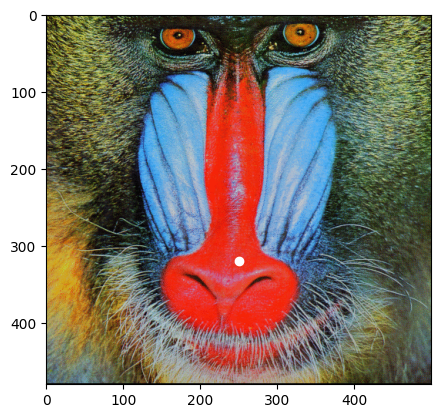

In [15]:
# Reading an image as BGR (Blue, Green, Red).

img = cv.imread('images/baboon.bmp')

# Convert the image from BGR to RGB. (OpenCV imports images as BGR by default.)

img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Showing the image using matplotlib

plt.imshow(img)

# Print the shape of the image matrix.

print(img.shape)

# Print a pixel value at a specific location.

print(img[320, 250])

# Show the pixel location on the plot.

plt.scatter(250, 320, color='w')

### Questions

**Question 1.** What is the width, height, and number of channels of the image? Pay attention to which dimension is the width and height.

**Question 2.** What is the value of the pixel at the position (150, 350) in the image in the red, green, and blue channels?<br />
In your own words, what color does that pixel value represent?

In [9]:
# Write your answer in this code block as a comment or using a print statement.

### Mathematical Operations on Images

Here is some example code to get you familiar with how to use numpy to manipulate images:

In [16]:
import numpy as np
import utils

# Creating arrays
a = np.array([1, 2, 3])  # Create a 1D numpy array
print("Array a:", a)

b = np.array([[1, 2, 3], [4, 5, 6]])  # Create a 2D numpy array (matrix)
print("\nArray b:\n", b)

# Basic operations (element-wise)
c = a * 2  # Multiply each element by 2
print("\nArray c (a * 2):", c)

d = a + c  # Add two arrays element-wise
print("\n")
utils.print_matrix_operation(a, c, a + c, "+")

# More complex operations
e = np.dot(a, c)  # Dot product of two arrays
print("\nDot product (a . c):")
utils.print_matrix_operation(a, c, e, ".")

# Matrix multiplication
f = np.array([[1, 2], [3, 4]])
g = np.array([[5, 6], [7, 8]])
h = np.dot(f, g)
print("\nMatrix multiplication (f @ g):")
utils.print_matrix_operation(f, g, h, "@")

print(f"\nElement-wise multiplication (f * g):")
utils.print_matrix_operation(f, g, f * g, "*")

Array a: [1 2 3]

Array b:
 [[1 2 3]
 [4 5 6]]

Array c (a * 2): [2 4 6]


[1 2 3] + [2 4 6]  = [3 6 9]

Dot product (a . c):
[1 2 3] . [2 4 6]  = 28

Matrix multiplication (f @ g):
[[1 2]    @ [[5 6]     = [[19 22]
 [3 4]]      [7 8]]       [43 50]]

Element-wise multiplication (f * g):
[[1 2]    * [[5 6]     = [[ 5 12]
 [3 4]]      [7 8]]       [21 32]]


In [17]:
# Creating an image-like 3-channel matrix
img = np.random.randint(0, 32, (5, 5, 3), dtype=np.uint8)  # Create a 5x5 "image" with 3 channels (RGB)
print("\nGenerated 5x5 RGB Image:\n")
utils.print_image_matrix(img)

# Accessing and modifying channels
red_channel = img[:, :, 0]  # Access the red channel
green_channel = img[:, :, 1]  # Access the green channel
blue_channel = img[:, :, 2]  # Access the blue channel

# Increase the intensity of the red channel by 50 (with clipping to max value of 255)
img[:, :, 0] = np.clip(red_channel + 50, 0, 255)
print("\nModified Image with Enhanced Red Channel:\n")
utils.print_image_matrix(img)

# Zero out the green channel (remove green)
img[:, :, 1] = 0
print("\nModified Image with Green Channel Removed:\n")
utils.print_image_matrix(img)


Generated 5x5 RGB Image:

[  8 21 18][ 17  9 21][ 28 31  8][  9 24  8][ 13  9  7]
[ 11  4  1][  8 25 29][ 20 10 12][ 16  4  2][ 15  2  4]
[ 22 10 23][ 31 16 14][ 21 16 28][  5 31 16][  9  9 12]
[  4  8 19][  4 23 26][ 11  6 28][ 16 23  7][ 23 17 27]
[ 26  2 25][  3 24 17][ 11 15 31][ 15 15 23][ 16 13 11]

Modified Image with Enhanced Red Channel:

[ 58 21 18][ 67  9 21][ 78 31  8][ 59 24  8][ 63  9  7]
[ 61  4  1][ 58 25 29][ 70 10 12][ 66  4  2][ 65  2  4]
[ 72 10 23][ 81 16 14][ 71 16 28][ 55 31 16][ 59  9 12]
[ 54  8 19][ 54 23 26][ 61  6 28][ 66 23  7][ 73 17 27]
[ 76  2 25][ 53 24 17][ 61 15 31][ 65 15 23][ 66 13 11]

Modified Image with Green Channel Removed:

[ 58  0 18][ 67  0 21][ 78  0  8][ 59  0  8][ 63  0  7]
[ 61  0  1][ 58  0 29][ 70  0 12][ 66  0  2][ 65  0  4]
[ 72  0 23][ 81  0 14][ 71  0 28][ 55  0 16][ 59  0 12]
[ 54  0 19][ 54  0 26][ 61  0 28][ 66  0  7][ 73  0 27]
[ 76  0 25][ 53  0 17][ 61  0 31][ 65  0 23][ 66  0 11]


You can find additional information about numpy in the README.md file:

https://github.com/ferit-osirv/lab1?tab=readme-ov-file#numpy--opencv

# Assignments

### Assignment 1: Extracting and Displaying Image Channels

#### Overview
Digital color images are typically composed of three primary color channels: Red, Green, and Blue (RGB). In this assignment, you will learn how to manipulate these channels using numpy, a powerful library for numerical computations in Python. Understanding how to extract and manipulate these channels is fundamental in image processing and forms the basis for more complex operations.

#### Goals
- Load a color image into a numpy array from the `images` folder.
- Understand the structure of color images in terms of channels.
- Extract and display each individual color channel.

#### Tasks

1. **Load a Color Image:**
   - Use OpenCV to load a provided color image into a numpy array. Ensure the image is in RGB format.

2. **Display the Original Image:**
   - Use `matplotlib` to display the original color image.

3. **Extract Color Channels:**
   - Extract each of the three color channels (Red, Green, Blue) from the image. Remember, a color image can be represented as a 3D numpy array with dimensions corresponding to height, width, and color channels.
   - Store each channel in a separate numpy array.

4. **Display Extracted Channels:**
   - Display each extracted channel as a grayscale image, where each pixel intensity corresponds to the intensity of that channel. For instance, in the red channel display, pixel intensities represent the amount of red in each pixel of the original image.
   - Ensure each displayed channel is titled appropriately (e.g., "Red Channel", "Green Channel", "Blue Channel") using `plt.title`.

#### Tips
- Pay close attention to the data type of the image array; image intensities are typically represented as integers (0-255), but operations on these arrays may result in a different data type, which can affect visualization.
- Consider the use of `matplotlib`'s `imshow` function with the `cmap='gray'` parameter to display the individual channels in grayscale.
- You can show multiple plots in one code block as such:

```python
plt.imshow(img1)
plt.show() # this will display the plot and reset the plot state
plt.imshow(img2)
plt.show()```

In [4]:
# Add 1 or more code blocks to complete Assignment 1.

____

### Assignment 2: Pixel-Level Image Manipulations

#### Overview
This assignment introduces you to fundamental image processing techniques at the pixel level. You will learn how to manipulate image pixels using basic mathematical operations and apply these techniques to blend images and enhance image contrast.

#### Goals
- Understand and apply basic arithmetic operations to images.
- Learn image blending techniques using alpha blending.
- Explore linear transformations for contrast enhancement.

#### Tasks

1. **Arithmetic Operations on an Image:**
   - Load a grayscale image and a color image of your choice.
   - Perform the following operations on both images separately with a scalar value \( c \):
     - Addition: $\text{New\_Pixel} = \text{Pixel} + c$
     - Subtraction: $\text{New\_Pixel} = \text{Pixel} - c$
     - Multiplication: $\text{New\_Pixel} = \text{Pixel} \times c$
     - Division: $\text{New\_Pixel} = \text{Pixel} / c$
   - Ensure that the resulting pixel values are clipped to the range [0, 255] to avoid overflow/underflow.
   - Display the original and transformed images side by side for comparison. Hint: use `np.hstack`.

2. **Image Blending:**
   - Load two images of the same dimensions (resize if necessary).
   - Blend the images using the formula: $$\text{Blended\_Image} = \alpha \times \text{Image1} + (1 - \alpha) \times \text{Image2},$$ where $\alpha$ is a value between 0 and 1 that you choose.
   - Experiment with different $\alpha$ values to observe the blending effect and display the results.

3. **Contrast Enhancement using Linear Transformation:**
   - Load an image and apply a linear transformation to enhance its contrast using the formula: $\text{New\_Pixel} = a \times \text{Pixel} + b$, where $a$ (slope) and $b$ (intercept) are constants you will choose.
   - Aim for a transformation that spreads out the pixel intensities over the full range \([0, 255]\). You may need to experiment with different values of $a$ and $b$.
   - Display the original and contrast-enhanced images for comparison.


____

### Assignment 3: Detailed Image Editing with Logical Operations and Numpy Indexing

#### Overview
This assignment delves into advanced techniques of pixel manipulation using logical operations for mask creation and numpy logical indexing for precise image editing. These skills are crucial for tasks like object detection, selective enhancement, and feature isolation in images.

#### Goals
- Utilize numpy logical indexing to perform specific edits on selected image regions.

#### Tasks

1. **Threshold-based Mask Creation:**
   - Load a grayscale image and choose a threshold value $T$ to separate light and dark regions.
   - Create a binary mask where pixels brighter than $T$ are set to 1 (white) and the rest to 0 (black). (Look at the numpy resources in the README.md file to see how.)
   - Display the original image next to the binary mask for visual comparison using numpy's `hstack` function.

2. **Foreground Isolation with a Binary Mask:**
   - Using the binary mask from Task 1, isolate the foreground by multiplying it with the original image. This should render the background black while retaining the foreground features.
   - Display the masked image to show the effect of foreground isolation.

3. **Selective Brightness Adjustment Using Logical Indexing:**
   - Increase the brightness of only the dark regions (e.g., pixels with values less than 100) in the original image by 50.
   - Ensure that the resulting pixel values do not exceed the maximum intensity value of 255 by clipping them.
   - Display the original and the brightness-adjusted images side by side to illustrate the change.

4. **Color Modification in Specific Regions for RGB Images:**
   - Load a color (RGB) image, use numpy logical indexing to change the color of a specific region. For example, change all pixels with a green intensity higher than 150 to pure red ([255, 0, 0]).
   - Display the original and the color-modified images to visualize the effect of your operation.

____

### Assignment 4: Reverse-engineering Image Processing

Take a look at the following two images:

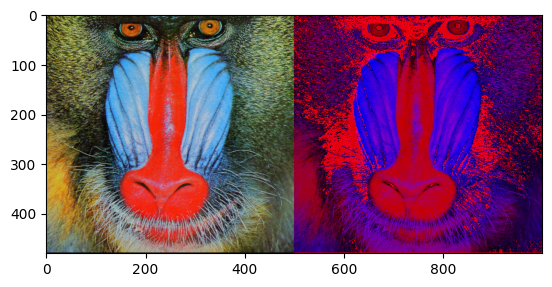

In [22]:
original = cv.imread('images/baboon.bmp')
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)
modified = cv.imread('images/baboon_modified.bmp')
modified = cv.cvtColor(modified, cv.COLOR_BGR2RGB)

plot_img = np.hstack((original, modified))
plt.imshow(plot_img)

The image on the right is a version of the image on the left modified by numpy operations you have learned so far.

### Tasks

 - Perform numpy operations on the `original` image (left) such that it looks as close as possible to the `modified` image (right).
 - Show your resulting image and `modified` side by side.

___

### Assignment 5: Creating a Circular Profile Picture from a Square Crop

#### Overview
This assignment challenges you to isolate a face within an image by first creating a square crop around the face and then applying a circular mask to this square crop. This mimics the process of creating circular profile pictures used in many social media platforms, where the subject's face is centered within a circular frame against a uniform background.

#### Goals
- Synthesize and apply various image processing techniques learned throughout the course.

#### Tasks

1. **Select an Image and Identify the Face Region:**
   - Choose an image that prominently features at least one face and add it to the project. Feel free to use your own pictures or ones you find on Google.
   - Estimate a square region that encompasses the face, as you would crop a profile picture.

2. **Square Cropping:**
   - Crop the image to the square region identified in Task 1. This will be your working image for the next steps. The crop should maintain the aspect ratio, resulting in a square image that fully contains the face.

3. **Calculate Circular Mask Parameters:**
   - For the square cropped image, calculate the center and radius for the circular mask. The circle's center will be the center of the square, and the radius should be such that the circle fits perfectly within the square bounds.

4. **Apply Circular Mask:**
   - Create a circular mask with OpenCV's [`circle` function](https://docs.opencv.org/3.4/dc/da5/tutorial_py_drawing_functions.html) with the same dimensions as the square cropped image. The area inside the circle should be opaque (keeping the face visible), and the area outside the circle should be set to black.
   - Apply this mask to the square cropped image to achieve the final circular crop, where only the circular region containing the face is visible, and the rest matches the specified background.
   - Show and save the image.

5. **Create an Image With Transparency:**
   - Convert the image to an RGBA image. RGBA has one additional channel, alpha, that determines how visible a pixel is. Research how to do this on your own. Display and save the new RGBA image.

Done! Don't forget to save the notebook on GitHub.